In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Assuming 'surveillance_data.xlsx' is your Excel file
xls = pd.ExcelFile('surveillance_data.xlsx')

# Get the names of all sheets in the Excel file
sheet_names = xls.sheet_names

# Read each sheet into a separate DataFrame and store them in a list
dfs = [pd.read_excel(xls, sheet_name) for sheet_name in sheet_names]

# Add a 'Year' column to each DataFrame
for i in range(len(dfs)):
    dfs[i]['Year'] = sheet_names[i].replace('_surveillance', '')
 
# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

# Convert the 'Year' column to datetime index
data['Year'] = data['Year'].astype(int)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

1. Trend visualisation:

In [3]:
data

,paragraph,subparagraph,description,description_en,BW,BY,BE,BB,HB,HH,...,NI,NW,RP,SL,SN,ST,SH,TH,GBA,overall
Year,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3,3.1,§ 100a Abs. 1 StPO,§ 100a paragraph 1 StPO,564,1203,302,81,24,205,...,584,274,270,44,243,129,294,81,53,5174
2021-01-01,4,4.1,Erstanordnungen,Initial orders,1483,3243,1044,163,113,629,...,1249,848,332,62,417,279,776,174,517,13977
2021-01-01,4,4.2,Verlängerungsanordnungen,Extension Orders,346,629,253,44,16,141,...,242,192,106,25,67,88,134,68,183,3248
2021-01-01,5,5.1,im richterlichen Beschlussangeordnet,ordered in a court order,2,0,4,0,0,5,...,0,20,0,0,0,0,0,1,1,35
2021-01-01,5,5.2,Tatsächlich durchgeführt,Actually done,1,0,3,0,0,0,...,0,16,0,0,0,0,0,0,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,6,6.10.a,Völkermord (§ 100a Abs. 2 Nr. 10a StPO),NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,6,6.10.b,Verbrechen gegen die Menschlichkeit(§ 100a Abs...,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,6,6.10.c,Kriegsverbrechen(§ 100a Abs. 2 Nr. 10c StPO),NaN,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,23,24


In [10]:
#We only analyse pargraph 6 as these are the actual crimes
data_paragraph6 = data[data['paragraph'].isin([1,6])]
data_paragraph6_int = data_paragraph6.select_dtypes(include=['int'])
data_yearly = data_paragraph6_int.groupby('Year').sum()
data_yearly

,paragraph,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH,GBA,overall
Year,,,,,,,,,,,,,,,,,,,
2013-01-01,234,2353,3501,2053,289,330,1175,5313,719,1701,2847,608,115,1166,523,107,338,660,23798
2016-01-01,65,2076,4271,1845,288,329,1332,5835,324,2262,1927,638,285,1122,473,315,203,928,24075
2019-01-01,252,2214,4186,1624,181,226,872,5680,365,1813,1132,548,99,654,415,258,285,1214,21675
2020-01-01,88,1988,3770,1364,268,150,949,5230,355,1335,1287,446,99,690,365,986,272,883,20437
2021-01-01,264,1854,3905,1302,207,129,770,5311,283,1603,1086,526,87,535,397,910,242,1114,20261


<Axes: xlabel='Year'>

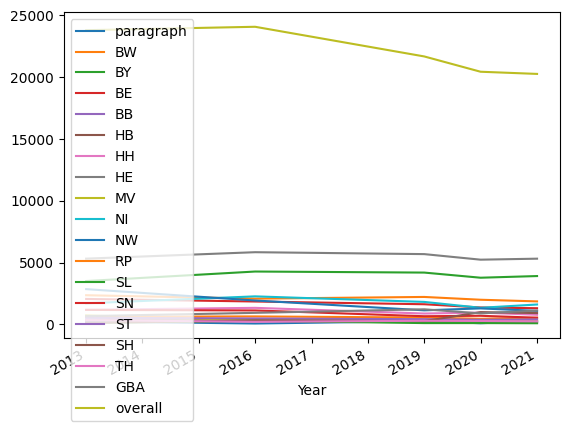

In [11]:
#plot the data
data_yearly.plot()